In [12]:
%matplotlib widget
%matplotlib inline
# %matplotlib notebook


import pandas as pd
df =  pd.read_csv('moves_dataset.csv')

In [13]:
np_df = df.to_numpy()
len(np_df)

100000

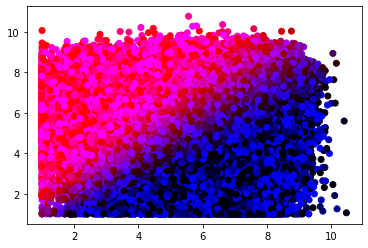

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

x = np_df[:,0]
y = np_df[:,1]
colors = np_df[:,2]
colors2 = np.zeros((len(colors),3))
for i in range(len(colors)):
    colors2[i][0] = colors[i]
    colors2[i][2] = colors[1-i]


plt.scatter(x, y, color=colors2)
plt.savefig('2_players_winner_plot.png')

In [17]:
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.layers import Input, Dense, Activation,Dropout
from keras.models import Model
from tqdm import tqdm

model = keras.Sequential([
    layers.Dense(128, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy', optimizer='adam')
# model.build((1,12))
# model.summary()

In [24]:
# best :2    0.0078
# best 3:    0.0137
# best all   0.0056


a = np_df[:,:2]
b = np_df[:,2+1:]
x = np.c_[a, b]

input = x
y = np_df[:,2]

x = np.c_[np_df[:,:2], a[:,2+1:]]
history = model.fit(input, y, batch_size=8, epochs=1, validation_split=0.1)


sum = 0
y_ = model.predict(input)
y = np_df[:,2]
for i in range(len(y)):
    sum += abs(y[i]-y_[i])
print(sum/len(y))


11250/11250 [==============================] - 10s 923us/step - loss: 0.3225 - val_loss: 0.3206
[0.00611157]


In [42]:
a = np_df[:test_size,:2]
b = np_df[:test_size,2+1:]
x = np.c_[a, b]

input = x
y = np_df[:test_size,2]

display_predict_size = 10
y_ = model.predict(input[:display_predict_size])
y = y[:display_predict_size]

for i in range(len(y)):
    "{:.5f}".format(y_[i][0])
    ys = round(y[i],5)
    ys_ = "{:.5f}".format(y_[i][0])
    delta = abs(ys - ys_)
    print(f"y: {ys}   y': {ys_}  delta: {delta} \n")

UFuncTypeError: ufunc 'subtract' did not contain a loop with signature matching types (dtype('<U32'), dtype('<U32')) -> dtype('<U32')